In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [2]:
action_train_data = pd.read_csv('action_train.csv',  engine='python')
action_train_data.head()

,Unnamed: 0,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
0,0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [3]:
action_test_data = pd.read_csv('action_test.csv', engine='python')
action_test_data.head()

,Unnamed: 0,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [4]:
person_data = pd.read_csv('person.csv')
person_data.head()

,Unnamed: 0,person_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,...,False,True,True,False,False,True,True,True,False,36
1,1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,...,False,True,True,True,True,True,True,True,False,76
2,2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,...,False,False,True,True,True,True,False,True,True,99
3,3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,...,True,True,True,True,True,True,True,True,True,76
4,4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,...,False,False,True,False,False,False,True,True,False,84


In [5]:
action_train_data.isnull().sum()

Unnamed: 0           0
person_id            0
action_id            0
date                 0
action_type          0
char_1         2039676
char_2         2039676
char_3         2039676
char_4         2039676
char_5         2039676
char_6         2039676
char_7         2039676
char_8         2039676
char_9         2039676
char_10         157615
result               0
dtype: int64

In [6]:
action_test_data.isnull().sum()

Unnamed: 0          0
person_id           0
action_id           0
date                0
action_type         0
char_1         458595
char_2         458595
char_3         458595
char_4         458595
char_5         458595
char_6         458595
char_7         458595
char_8         458595
char_9         458595
char_10         40092
dtype: int64

In [7]:
person_data.isnull().sum()

Unnamed: 0    0
person_id     0
char_1        0
group_1       0
char_2        0
date          0
char_3        0
char_4        0
char_5        0
char_6        0
char_7        0
char_8        0
char_9        0
char_10       0
char_11       0
char_12       0
char_13       0
char_14       0
char_15       0
char_16       0
char_17       0
char_18       0
char_19       0
char_20       0
char_21       0
char_22       0
char_23       0
char_24       0
char_25       0
char_26       0
char_27       0
char_28       0
char_29       0
char_30       0
char_31       0
char_32       0
char_33       0
char_34       0
char_35       0
char_36       0
char_37       0
char_38       0
dtype: int64

In [8]:
y_train = action_train_data['result']
X_train = action_train_data.drop('result', axis=1)
X_test = action_test_data

In [9]:
cat_features_mask_train = (X_train.dtypes == "object").values
X_real_train = X_train[X_train.columns[~cat_features_mask_train]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real_train = pd.DataFrame(data=mis_replacer.fit_transform(X_real_train), columns=X_real_train.columns)
X_cat_train = X_train[X_train.columns[cat_features_mask_train]].fillna("0")
X_no_mis_train = pd.concat([X_no_mis_real_train, X_cat_train], axis=1)
X_no_mis_train.head(10)

,Unnamed: 0,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,0.0,ppl_100,act2_1734928,2023-08-26,type 4,0,0,0,0,0,0,0,0,0,type 76
1,1.0,ppl_100,act2_2434093,2022-09-27,type 2,0,0,0,0,0,0,0,0,0,type 1
2,2.0,ppl_100,act2_3404049,2022-09-27,type 2,0,0,0,0,0,0,0,0,0,type 1
3,3.0,ppl_100,act2_3651215,2023-08-04,type 2,0,0,0,0,0,0,0,0,0,type 1
4,4.0,ppl_100,act2_4109017,2023-08-26,type 2,0,0,0,0,0,0,0,0,0,type 1
5,5.0,ppl_100,act2_898576,2023-08-04,type 4,0,0,0,0,0,0,0,0,0,type 1727
6,6.0,ppl_100002,act2_1233489,2022-11-23,type 2,0,0,0,0,0,0,0,0,0,type 1
7,7.0,ppl_100002,act2_1623405,2022-11-23,type 2,0,0,0,0,0,0,0,0,0,type 1
8,8.0,ppl_100003,act2_1111598,2023-02-07,type 2,0,0,0,0,0,0,0,0,0,type 1
9,9.0,ppl_100003,act2_1177453,2023-06-28,type 2,0,0,0,0,0,0,0,0,0,type 1


In [10]:
X_no_mis_train.isnull().sum()

Unnamed: 0     0
person_id      0
action_id      0
date           0
action_type    0
char_1         0
char_2         0
char_3         0
char_4         0
char_5         0
char_6         0
char_7         0
char_8         0
char_9         0
char_10        0
dtype: int64

In [11]:
person_data.shape

(189118, 42)

In [12]:
action_train_data.shape

(2197291, 16)

In [13]:
X_no_mis_train.shape

(2197291, 15)

In [14]:
action_train_data.dtypes

Unnamed: 0      int64
person_id      object
action_id      object
date           object
action_type    object
char_1         object
char_2         object
char_3         object
char_4         object
char_5         object
char_6         object
char_7         object
char_8         object
char_9         object
char_10        object
result          int64
dtype: object

In [15]:
ord_enc = OrdinalEncoder()

In [16]:
X_no_mis_train[["person_id_code"]] = ord_enc.fit_transform(X_no_mis_train[["person_id"]])
X_no_mis_train[["action_type_code"]] = ord_enc.fit_transform(X_no_mis_train[["action_type"]])
X_no_mis_train[["char_1_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_1"]])
X_no_mis_train[["char_2_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_2"]])
X_no_mis_train[["char_3_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_3"]])
X_no_mis_train[["char_4_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_4"]])
X_no_mis_train[["char_5_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_5"]])
X_no_mis_train[["char_6_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_6"]])
X_no_mis_train[["char_7_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_7"]])
X_no_mis_train[["char_8_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_8"]])
X_no_mis_train[["char_9_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_9"]])
X_no_mis_train[["char_10_code"]] = ord_enc.fit_transform(X_no_mis_train[["char_10"]])
X_no_mis_train = X_no_mis_train.drop('Unnamed: 0', axis=1)
X_no_mis_train.head(11)

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,...,char_1_code,char_2_code,char_3_code,char_4_code,char_5_code,char_6_code,char_7_code,char_8_code,char_9_code,char_10_code
0,ppl_100,act2_1734928,2023-08-26,type 4,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5383.0
1,ppl_100,act2_2434093,2022-09-27,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ppl_100,act2_3404049,2022-09-27,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ppl_100,act2_3651215,2023-08-04,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ppl_100,act2_4109017,2023-08-26,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,ppl_100,act2_898576,2023-08-04,type 4,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763.0
6,ppl_100002,act2_1233489,2022-11-23,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,ppl_100002,act2_1623405,2022-11-23,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,ppl_100003,act2_1111598,2023-02-07,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,ppl_100003,act2_1177453,2023-06-28,type 2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
X_no_mis_train.dtypes

person_id            object
action_id            object
date                 object
action_type          object
char_1               object
char_2               object
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10              object
person_id_code      float64
action_type_code    float64
char_1_code         float64
char_2_code         float64
char_3_code         float64
char_4_code         float64
char_5_code         float64
char_6_code         float64
char_7_code         float64
char_8_code         float64
char_9_code         float64
char_10_code        float64
dtype: object

In [18]:
X_train_coded = X_no_mis_train[['person_id_code', 'action_type_code', 'char_1_code', 'char_2_code', 'char_3_code', 'char_4_code', 'char_5_code',
                 'char_6_code', 'char_7_code', 'char_8_code', 'char_9_code', 'char_10_code']]
X_train_coded.head()

,person_id_code,action_type_code,char_1_code,char_2_code,char_3_code,char_4_code,char_5_code,char_6_code,char_7_code,char_8_code,char_9_code,char_10_code
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5383.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_train_coded)
X_train_norm = pd.DataFrame(data=X_real_norm_np)
X_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.826247
1,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
2,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
3,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
4,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153


In [20]:
cat_features_mask_test = (X_test.dtypes == "object").values
X_real_test = X_test[X_test.columns[~cat_features_mask_test]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real_test = pd.DataFrame(data=mis_replacer.fit_transform(X_real_test), columns=X_real_test.columns)
X_cat_test = X_test[X_test.columns[cat_features_mask_test]].fillna("0")
X_no_mis_test = pd.concat([X_no_mis_real_test, X_cat_test], axis=1)
X_no_mis_test.drop
X_no_mis_test.head(10)

,Unnamed: 0,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,0.0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,0
1,1.0,ppl_100004,act2_230855,2022-07-20,type 5,0,0,0,0,0,0,0,0,0,type 682
2,2.0,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,0
3,3.0,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,0
4,4.0,ppl_10001,act2_1043301,2022-10-15,type 5,0,0,0,0,0,0,0,0,0,type 3015
5,5.0,ppl_10001,act2_112890,2022-11-27,type 5,0,0,0,0,0,0,0,0,0,type 4987
6,6.0,ppl_10001,act2_1169930,2022-10-15,type 5,0,0,0,0,0,0,0,0,0,type 3015
7,7.0,ppl_10001,act2_1924448,2022-10-15,type 5,0,0,0,0,0,0,0,0,0,type 3015
8,8.0,ppl_10001,act2_1953554,2022-10-15,type 5,0,0,0,0,0,0,0,0,0,type 3015
9,9.0,ppl_10001,act2_1971739,2022-11-28,type 5,0,0,0,0,0,0,0,0,0,type 3015


In [21]:
X_no_mis_test[["person_id_code"]] = ord_enc.fit_transform(X_no_mis_test[["person_id"]])
X_no_mis_test[["action_type_code"]] = ord_enc.fit_transform(X_no_mis_test[["action_type"]])
X_no_mis_test[["char_1_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_1"]])
X_no_mis_test[["char_2_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_2"]])
X_no_mis_test[["char_3_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_3"]])
X_no_mis_test[["char_4_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_4"]])
X_no_mis_test[["char_5_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_5"]])
X_no_mis_test[["char_6_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_6"]])
X_no_mis_test[["char_7_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_7"]])
X_no_mis_test[["char_8_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_8"]])
X_no_mis_test[["char_9_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_9"]])
X_no_mis_test[["char_10_code"]] = ord_enc.fit_transform(X_no_mis_test[["char_10"]])
X_no_mis_test = X_no_mis_test.drop('Unnamed: 0', axis=1)
X_no_mis_test.head(11)

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,...,char_1_code,char_2_code,char_3_code,char_4_code,char_5_code,char_6_code,char_7_code,char_8_code,char_9_code,char_10_code
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,...,42.0,2.0,7.0,1.0,6.0,1.0,1.0,16.0,14.0,0.0
1,ppl_100004,act2_230855,2022-07-20,type 5,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3135.0
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,...,4.0,1.0,7.0,4.0,6.0,1.0,1.0,5.0,2.0,0.0
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,...,13.0,2.0,7.0,4.0,6.0,1.0,1.0,14.0,15.0,0.0
4,ppl_10001,act2_1043301,2022-10-15,type 5,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1631.0
5,ppl_10001,act2_112890,2022-11-27,type 5,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2630.0
6,ppl_10001,act2_1169930,2022-10-15,type 5,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1631.0
7,ppl_10001,act2_1924448,2022-10-15,type 5,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1631.0
8,ppl_10001,act2_1953554,2022-10-15,type 5,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1631.0
9,ppl_10001,act2_1971739,2022-11-28,type 5,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1631.0


In [22]:
X_test_coded = X_no_mis_test[['person_id_code', 'action_type_code', 'char_1_code', 'char_2_code', 'char_3_code', 'char_4_code', 'char_5_code',
                 'char_6_code', 'char_7_code', 'char_8_code', 'char_9_code', 'char_10_code']]
X_test_coded.head()

,person_id_code,action_type_code,char_1_code,char_2_code,char_3_code,char_4_code,char_5_code,char_6_code,char_7_code,char_8_code,char_9_code,char_10_code
0,0.0,0.0,42.0,2.0,7.0,1.0,6.0,1.0,1.0,16.0,14.0,0.0
1,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3135.0
2,1.0,0.0,4.0,1.0,7.0,4.0,6.0,1.0,1.0,5.0,2.0,0.0
3,1.0,0.0,13.0,2.0,7.0,4.0,6.0,1.0,1.0,14.0,15.0,0.0
4,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1631.0


In [23]:
normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_test_coded)
X_test_norm = pd.DataFrame(data=X_real_norm_np)
X_test_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.875000,0.064516,0.636364,0.142857,1.0,0.2,0.125,0.888889,0.736842,0.000000
1,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.791467
2,0.000026,0.000000,0.083333,0.032258,0.636364,0.571429,1.0,0.2,0.125,0.277778,0.105263,0.000000
3,0.000026,0.000000,0.270833,0.064516,0.636364,0.571429,1.0,0.2,0.125,0.777778,0.789474,0.000000
4,0.000026,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.411765


In [24]:
X_test_norm.shape

(498687, 12)

In [25]:
X_train_norm.shape

(2197291, 12)

In [26]:
X_test.shape

(498687, 15)

In [108]:
clf_2 = RandomForestClassifier(max_depth=45, random_state=0)

In [31]:
clf_2.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [32]:
result_2 = clf_2.predict(X_test_norm)
pd.Series(result_2).head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [33]:
clf_2.score(X_test_norm, result_2)

1.0

In [34]:
pd.Series(clf_2.feature_importances_)

0     0.256861
1     0.310242
2     0.005903
3     0.008820
4     0.005811
5     0.011490
6     0.013446
7     0.013667
8     0.003457
9     0.002429
10    0.011159
11    0.356715
dtype: float64

In [35]:
X_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.826247
1,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
2,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
3,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153
4,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000153


In [36]:
X_train_imp = X_train_norm[[0, 1, 11]]
X_train_imp.head()

,0,1,11
0,0.0,0.500000,0.826247
1,0.0,0.166667,0.000153
2,0.0,0.166667,0.000153
3,0.0,0.166667,0.000153
4,0.0,0.166667,0.000153


In [37]:
X_test_norm.shape

(498687, 12)

In [38]:
X_test_imp = X_test_norm[[0, 1, 11]]
X_test_imp.head()

,0,1,11
0,0.000000,0.000000,0.000000
1,0.000000,0.666667,0.791467
2,0.000026,0.000000,0.000000
3,0.000026,0.000000,0.000000
4,0.000026,0.666667,0.411765


In [49]:
X_train_train, X_test_test, y_train_train, y_test_test = train_test_split(X_train_imp, y_train, test_size=0.33, random_state=0)

In [109]:
clf_2.fit(X_train_train, y_train_train)

RandomForestClassifier(max_depth=45, random_state=0)

In [110]:
y_pred = clf_2.predict(X_test_test)

In [111]:
clf_2.score(X_test_test, y_pred)

1.0

In [112]:
precision_score(y_test_test, y_pred)

0.8984100408107991

In [113]:
recall_score(y_test_test, y_pred)

0.9062589257994411

In [114]:
y_predicted_prob = clf_2.predict_proba(X_test_test)
y_predicted_prob

array([[0.96028496, 0.03971504],
       [0.95339811, 0.04660189],
       [1.        , 0.        ],
       ...,
       [0.70351189, 0.29648811],
       [0.11734349, 0.88265651],
       [0.96993043, 0.03006957]])

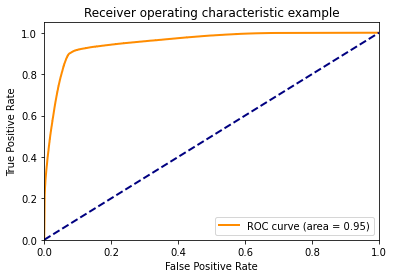

In [115]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [116]:
result = clf_2.predict(X_test_imp)
pd.Series(result).head()

0    0
1    0
2    0
3    0
4    1
dtype: int64

In [117]:
clf_2.score(X_test_imp, result)

1.0

In [118]:
y_predicted_prob_2 = clf_2.predict_proba(X_test_imp)
y_predicted_prob_2

array([[0.99, 0.01],
       [0.62, 0.38],
       [0.99, 0.01],
       ...,
       [0.03, 0.97],
       [0.03, 0.97],
       [0.03, 0.97]])

In [119]:
result = y_predicted_prob_2[:,1]
result = pd.Series(result)
result

0         0.01
1         0.38
2         0.01
3         0.01
4         0.65
          ... 
498682    0.97
498683    0.97
498684    0.97
498685    0.97
498686    0.97
Length: 498687, dtype: float64

In [120]:
action_test = pd.DataFrame(X_no_mis_test['action_id'])
action_test['result'] = pd.Series(result)
action_test

,action_id,result
0,act1_249281,0.01
1,act2_230855,0.38
2,act1_240724,0.01
3,act1_83552,0.01
4,act2_1043301,0.65
...,...,...
498682,act2_4367092,0.97
498683,act2_4404220,0.97
498684,act2_448830,0.97
498685,act2_450133,0.97


In [42]:
#cross_val_score(clf_2, X_train_imp, y_train, cv=5)

array([0.55604505, 0.48285388, 0.55604631, 0.55604631, 0.48050098])

In [43]:
#from sklearn.model_selection import GridSearchCV

In [44]:
#parametrs = {'max_depth': range(1, 5)}

In [45]:
#grid_search_cv_clf = GridSearchCV(clf_2, parametrs, cv=3)

In [46]:
#grid_search_cv_clf.fit(X_train_train, y_train_train)

KeyboardInterrupt: 

In [ ]:
#rid_search_cv_clf.best_params_

In [ ]:
#best_clf_2 = grid_search_cv_clf.best_estimator_

In [ ]:
#best_clf_2.score(X_test_imp, result_3)

In [ ]:
#from sklearn.metrics import precision_score, recall_score

In [ ]:
#y_predicted_prob = best_clf_2.predict_proba(X_test)
y_predicted_prob

In [ ]:
#resulted = y_predicted_prob[:, 1]

In [ ]:
#pd.Series(resulted)

In [ ]:
#result = pd.Series(resulted)

In [ ]:
#result.sum()

In [ ]:
#X_test.shape

In [ ]:
#X_test.head()